### Àlex Correa Orri 1564967

#### Dataset: https://www.kaggle.com/shaurov/website-classification-using-url

In [609]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


### MÒDULS I LLIBRERIES

In [610]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import os
from nltk.corpus import stopwords

### DIRECTORI DE TREBALL

In [611]:
os.getcwd()
path = 'C:/Users/alexc/OneDrive/Escritorio/UNI/3er/Aprenentatge Computacional/PRAC_KAGGLE'
os.chdir(path)
os.getcwd()

'C:\\Users\\alexc\\OneDrive\\Escritorio\\UNI\\3er\\Aprenentatge Computacional\\PRAC_KAGGLE'

### LECTURA DE DADES

In [612]:
# Carreguem dataset d'exemple
dataset = pd.read_csv('URL_Classification.csv', names=['n', 'url', 'class'], delimiter=',', na_filter=False)

### MODIFICACIÓ DEL DATASET

In [613]:
dataset=dataset.dropna()
print(dataset['class'].unique())
len(dataset['class'].unique())

['Adult' 'Arts' 'Business' 'Computers' 'Games' 'Health' 'Home' 'Kids'
 'News' 'Recreation' 'Reference' 'Science' 'Shopping' 'Society' 'Sports']


15

In [614]:
stp_w = ['www', 'http', 'com', 'comhttp', 'org', 'htmlhttp', 'htmhttp', 'edu', 'co', 'uk', 'net', 'orghttp','html','nethttp','shtmlhttp', 'ukhttp','dehttp','zahttp','jpghttp']

In [615]:
test_data = []
size_per_class = 1000
for c in dataset['class'].unique():
    test_data.append(dataset[dataset['class'] == c][0:size_per_class])
test_data = pd.concat([test_data[0], test_data[1],test_data[2],test_data[3],test_data[4],test_data[5], test_data[6],test_data[7],test_data[8],test_data[9],test_data[10], test_data[11],test_data[12],test_data[13],test_data[14]], axis=0)

In [616]:
for c in dataset['class'].unique():
    f_i = dataset[dataset['class'] == c].index[0]
    l_i = f_i + size_per_class - 1
    dataset.drop(dataset.index[f_i:l_i],inplace= True)


In [617]:
train_data = dataset

<AxesSubplot:xlabel='count', ylabel='class'>

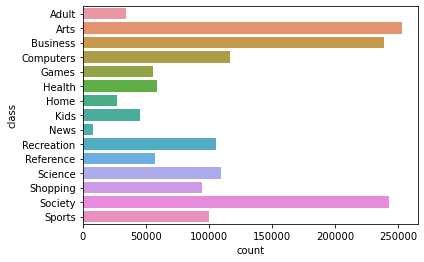

In [618]:
ax = sns.countplot(y = "class",  data = train_data)
ax

Text(0.5, 0, 'Number of Categories of URLs')

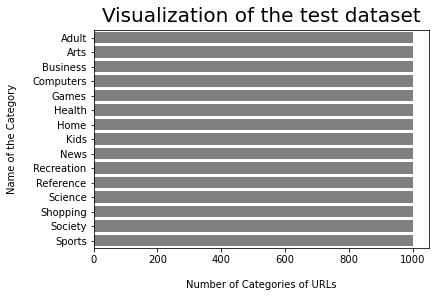

In [619]:
ax = sns.countplot(y = "class",  data = test_data , color = 'gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

In [620]:
#test_data.set_index(['class', 'n']).count(level="class")

In [621]:
X_train=train_data['url']
y_train=train_data['class']
#X_train, x_v, y_train, y_v = train_test_split(X_train, y_train, train_size=0.95, stratify=y_train)

In [622]:
X_test=test_data['url']
y_test=test_data['class']
#X_test, x_v, y_test, y_v = train_test_split(X_test, y_test, train_size=0.95, stratify=y_test)

#### Pipeline Multinomial

In [623]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(3,3))
clf = Pipeline([('vect', vectorizer), 
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB(fit_prior=False, alpha = 0.0001)),
                  ])
clf = clf.fit(X_train, y_train)

In [624]:
y_pred=clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9614089865099329, 0.9601333333333333, 0.9595976305811741, None)

In [625]:
print(classification_report(y_test, y_pred, digits = 3))

              precision    recall  f1-score   support

       Adult      0.996     0.784     0.877      1000
        Arts      0.879     0.985     0.929      1000
    Business      0.980     0.987     0.984      1000
   Computers      0.980     0.958     0.969      1000
       Games      0.984     0.986     0.985      1000
      Health      0.987     0.999     0.993      1000
        Home      0.955     0.997     0.976      1000
        Kids      0.928     0.943     0.936      1000
        News      0.951     0.990     0.970      1000
  Recreation      0.944     0.962     0.953      1000
   Reference      0.938     0.949     0.943      1000
     Science      0.954     0.944     0.949      1000
    Shopping      0.978     0.999     0.989      1000
     Society      0.974     0.924     0.948      1000
      Sports      0.993     0.995     0.994      1000

    accuracy                          0.960     15000
   macro avg      0.961     0.960     0.960     15000
weighted avg      0.961   